# Visualizing loan applicants data

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing the different datasets
current_app_df = pd.read_csv('application_data.csv')
previous_app_df = pd.read_csv('previous_application.csv')

## Understanding which variable are significant

In [3]:
## Getting all columns of current applicants
curr_app_significant_cols = current_app_df.columns.to_list()
## Getting all columns of previous applicants
prev_app_sig_cols = previous_app_df.columns.to_list()

> Going by the assumption that Income will be the primary variable which affects loan applicants ability to repay their loan, some analysis on the same needs to be done


In [14]:
current_app_df['AMT_INCOME_TOTAL_INT'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL_INT, dtype: float64

### Understanding Income variable in current and previous applicants

### Understanding income distributions

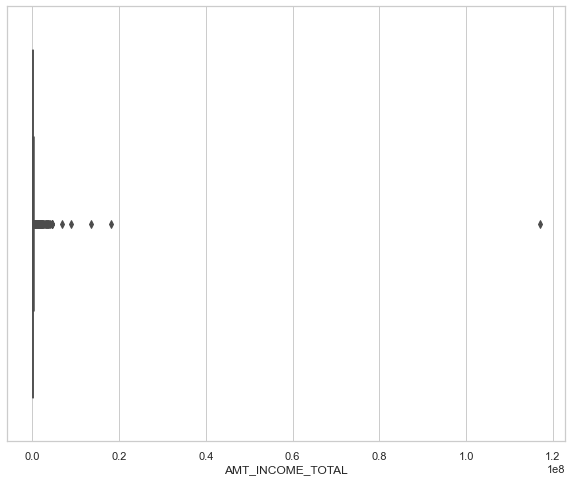

In [5]:
## Current applicants
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.boxplot(x=current_app_df['AMT_INCOME_TOTAL'].astype('int'))
plt.show()


> Boxplot is not a good indicator of income distribution (most of the variables seem to lie in one center of the distribution), but lets try to analyse the variable and see if it helps.

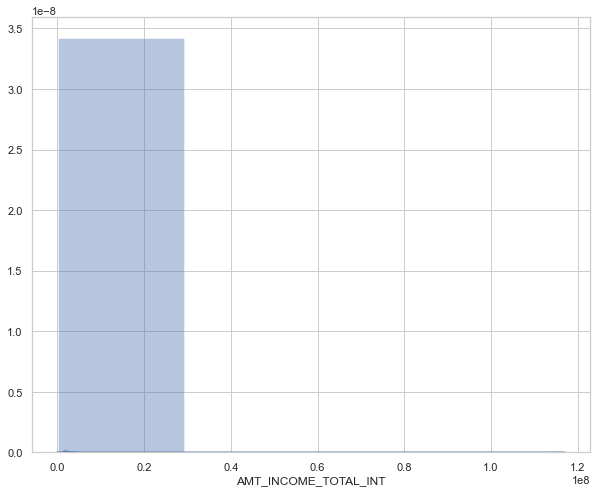

In [37]:
## Histogram of total income
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
current_app_df['AMT_INCOME_TOTAL_INT'] = current_app_df['AMT_INCOME_TOTAL'].astype('int')
sns.distplot(current_app_df['AMT_INCOME_TOTAL_INT'],bins=4,)
plt.show()

> Histogram also has difficulty in representing the data even in integers, we need more categories and bins to represent the same before we use a distplot

**Converting the income distribution to categories, let's see what results we get**

In [38]:
# Converting to integer
current_app_df['AMT_INCOME_TOTAL_INT'] = current_app_df['AMT_INCOME_TOTAL'].astype(int)
# Understanding the range of data and where most of the data lies
current_app_df['AMT_INCOME_TOTAL_INT'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL_INT, dtype: float64

In [39]:
# Our data lies in this range , lets define bins and categories for the same
bins = [25000,75000,125000,175000,225000,275000,np.inf]
categories = ['25K-75K','75K-125K','125K-175K','175K-225K','225K-275K','275K+']
# Introducing a new variable income_range which will help analyse ranges of income where people fall in.
current_app_df['INCOME_RANGE'] = pd.cut(current_app_df['AMT_INCOME_TOTAL_INT'],bins,labels=categories)

In [35]:
current_app_df['INCOME_RANGE'].head(10)

0    175K-225K
1    225K-275K
2      25K-75K
3    125K-175K
4     75K-125K
5     75K-125K
6    125K-175K
7        275K+
8     75K-125K
9    125K-175K
Name: INCOME_RANGE, dtype: category
Categories (6, object): [25K-75K < 75K-125K < 125K-175K < 175K-225K < 225K-275K < 275K+]

### Understanding the distributions of income in the dataset

In [47]:
## Histogram of categorical incomes
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
current_app_df['INCOME_RANGE'].value_counts()
sns.distplot(data=current_appx='INCOME_RANGE',bins=5)
plt.show()

TypeError: distplot() got an unexpected keyword argument 'x'

<Figure size 720x576 with 0 Axes>